In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


data=pd.read_csv('./Titanic-Dataset.csv') #importamos datos del archivo csv
data.head(20)



,PassengerId,Survived,Clase,Nombre,Sexo,Edad,SibSp,Parch,Ticket,Tarifa,Cabina,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Text(0.5, 1.0, 'Edad')

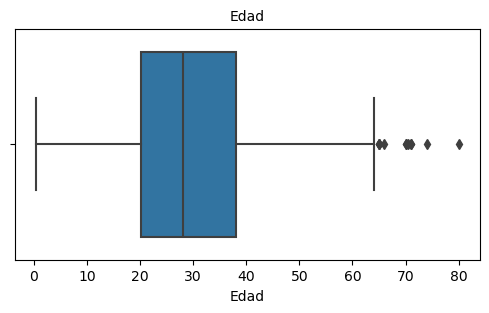

In [2]:
#identificamos los valores faltamtes o atipicos 
plt.figure(figsize=(6,3))
sns.boxplot(x=data['Edad'])
plt.title('Edad', fontsize=10)

In [3]:
#Contamos los valores nulos
valores_nulos = data["Edad"].isnull()
print("Los valores nulos son de edad: ",valores_nulos.sum())
valores_nulos = data["Cabina"].isnull()
print("Los valores nulos son de Cabina: ",valores_nulos.sum())

Los valores nulos son de edad:  177
Los valores nulos son de Cabina:  687


In [7]:
#Cambiamos los valores nulos  de edad por la media redondeada
media1 = data["Edad"].mean().round(0)
data["Edad"].fillna(media1, inplace=True)


In [8]:
moda = data["Cabina"].mode().iloc[0]
data["Cabina"].fillna(moda, inplace=True)

Text(0.5, 1.0, 'Edad')

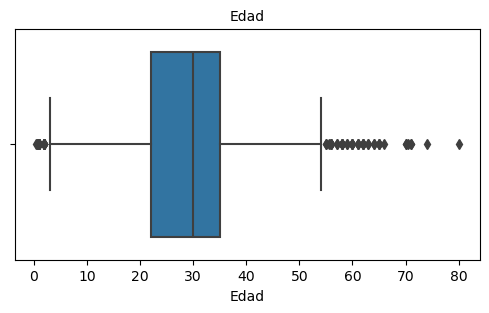

In [9]:
#comprobamos valores atipicos 
plt.figure(figsize=(6,3))
sns.boxplot(x=data['Edad'])
plt.title('Edad', fontsize=10)

In [10]:
data.describe()

,PassengerId,Survived,Clase,Edad,SibSp,Parch,Tarifa
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
# Eliminar las columnas especificadas
data=data[["Survived","Clase","Edad",]]

In [45]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [46]:
data[['Survived']].head(20)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [47]:
#punto 4

X=data.drop('Survived',axis=1)
Y=data['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, stratify=Y, random_state=0)


In [48]:
print(X_train)

     Clase  Edad
671      1  31.0
417      2  18.0
634      3   9.0
323      2  22.0
379      3  19.0
..     ...   ...
131      3  20.0
490      3  30.0
528      3  39.0
48       3  30.0
80       3  22.0

[668 rows x 2 columns]


In [49]:
print(Y_train)

671    0
417    1
634    0
323    1
379    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 668, dtype: int64


In [56]:
#paso 5 modelo de regrecion logistica 

modelo_regresion=LogisticRegression(solver ="liblinear")
modelo_regresion.fit(X_train, Y_train)

prediccion=modelo_regresion.predict(X_test)

In [57]:
print(Y_test)

288    1
869    1
182    0
684    0
599    1
      ..
882    0
434    0
304    0
500    0
633    0
Name: Survived, Length: 223, dtype: int64


In [58]:
print (prediccion) 

[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 1]


In [59]:
# paso 6 evaluar el desempeño del modelo de regresion 

print (classification_report(Y_test,prediccion))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       137
           1       0.67      0.41      0.51        86

    accuracy                           0.70       223
   macro avg       0.69      0.64      0.64       223
weighted avg       0.69      0.70      0.67       223



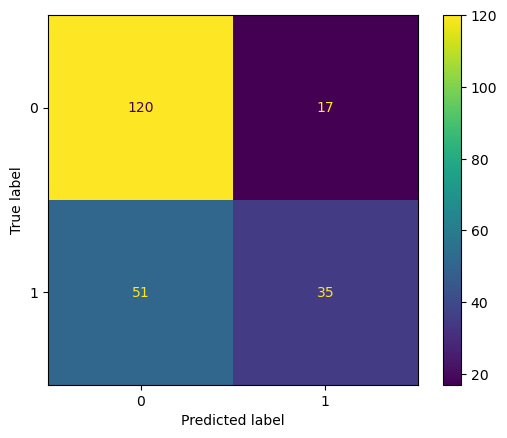

In [60]:
#paso 7 graficar
#matriz de confusion
cm=confusion_matrix(Y_test,prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


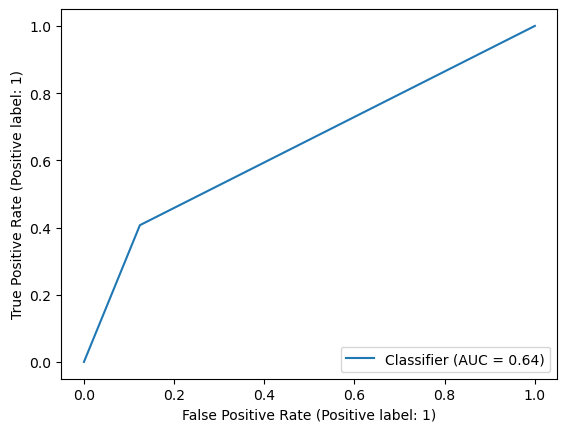

In [61]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test,prediccion)